# Model Implementation

2.1 K-Nearest Neighbors

In [1]:
#class defined in a seperate file knn.py

2.2 Linear Regression

In [2]:
#defined in a seperate file linearregression.py

2.3 Logistic Regression

In [3]:
#defined in a seperate file logisticregression.py

3 Making Predictions and Evaluating Results 


3.1.1 KNN Boston House-Prices

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [203]:
from sklearn.datasets import load_boston #load boston dataset

In [204]:
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
#boston_data.feature_names
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [205]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [206]:
df_boston['CHAS'].unique() # only 1 and 0

array([0., 1.])

In [207]:
def transform_to_yes_or_no(CHAS):
    if CHAS == 1.0:
        return "Tract bounds river"
    if CHAS == 0.0:
        return "Not tradt bounds river"
df_boston['CHAS'] = df_boston['CHAS'].astype('object')
df_boston['CHAS'] = df_boston['CHAS'].apply(transform_to_yes_or_no)

In [208]:
df_boston.describe(include='O')

,CHAS
count,506
unique,2
top,Not tradt bounds river
freq,471


In [209]:
df_boston.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [210]:
import knn
knn_boston = knn.KNN(k=3,is_classification=False)

In [211]:
X = boston_data.data
y = boston_data.target

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [213]:
knn_boston.fit(X_train, y_train)

In [214]:
knn_boston._compute_distance(X_train[0], X_train[1]) # in this case, x is a multi-dimension vector

359.9138627980841

In [215]:
knn_boston.predict(X_train[0]) # test prediction, regression returns mean of the closest neighbours

[14.6, 17.8, 17.8]


16.733333333333334

In [216]:
y_pred = []
# This code is running the prediction for each one of the instances in the test set.
for instance in X_test:
    y_pred.append(knn_boston.predict(instance))
y_pred

[21.6, 23.8, 29.9]
[33.1, 32.0, 33.2]
[15.2, 20.1, 8.5]
[21.7, 46.7, 23.9]
[21.7, 17.7, 14.6]
[50.0, 20.4, 17.5]
[19.6, 16.2, 21.6]
[13.3, 16.2, 18.4]
[20.2, 21.7, 17.7]
[17.5, 27.5, 19.3]
[23.0, 28.7, 23.9]
[15.0, 27.1, 19.6]
[8.4, 14.1, 13.4]
[24.5, 21.2, 17.5]
[29.9, 18.9, 22.6]
[23.2, 20.6, 23.2]
[20.5, 21.4, 17.3]
[11.9, 12.1, 13.9]
[37.3, 27.9, 44.0]
[11.5, 13.3, 8.5]
[35.1, 25.0, 23.4]
[33.1, 32.0, 33.2]
[13.6, 16.6, 18.2]
[20.6, 21.4, 18.9]
[14.9, 16.7, 21.9]
[15.2, 19.9, 16.8]
[24.5, 23.1, 21.2]
[13.4, 8.3, 13.5]
[23.0, 28.7, 22.0]
[17.5, 21.2, 27.5]
[23.8, 19.6, 26.7]
[27.1, 22.2, 24.4]
[12.7, 8.3, 7.2]
[50.0, 50.0, 17.8]
[27.9, 14.9, 16.7]
[25.0, 17.4, 15.6]
[26.6, 22.2, 19.4]
[19.0, 36.2, 22.2]
[20.0, 22.4, 23.3]
[21.7, 46.7, 23.9]
[17.5, 21.2, 27.5]
[33.4, 28.4, 24.4]
[44.0, 37.3, 50.0]
[22.0, 24.3, 17.5]
[28.7, 21.4, 22.0]
[8.5, 12.5, 16.7]
[13.6, 16.6, 18.2]
[21.7, 46.7, 23.9]
[20.0, 19.5, 22.7]
[20.1, 22.2, 23.9]
[15.0, 27.1, 30.1]
[35.1, 21.1, 36.1]
[21.7, 19.6, 18.4]


[25.100000000000005,
 32.766666666666666,
 14.6,
 30.76666666666667,
 18.0,
 29.3,
 19.133333333333333,
 15.966666666666667,
 19.866666666666664,
 21.433333333333334,
 25.2,
 20.566666666666666,
 11.966666666666667,
 21.066666666666666,
 23.8,
 22.333333333333332,
 19.733333333333334,
 12.633333333333333,
 36.4,
 11.1,
 27.833333333333332,
 32.766666666666666,
 16.133333333333336,
 20.3,
 17.833333333333332,
 17.299999999999997,
 22.933333333333334,
 11.733333333333334,
 24.566666666666666,
 22.066666666666666,
 23.36666666666667,
 24.566666666666663,
 9.4,
 39.266666666666666,
 19.833333333333332,
 19.333333333333332,
 22.73333333333333,
 25.8,
 21.900000000000002,
 30.76666666666667,
 22.066666666666666,
 28.73333333333333,
 43.76666666666667,
 21.266666666666666,
 24.03333333333333,
 12.566666666666668,
 16.133333333333336,
 30.76666666666667,
 20.733333333333334,
 22.066666666666663,
 24.066666666666666,
 30.76666666666667,
 19.9,
 22.066666666666666,
 31.933333333333337,
 20.83333

In [217]:
print(r2_score(y_test, y_pred)) #evaluate the KNN regression

0.6142568210665578


In [219]:
mean_squared_error(y_test, y_pred)

29.192468396540256

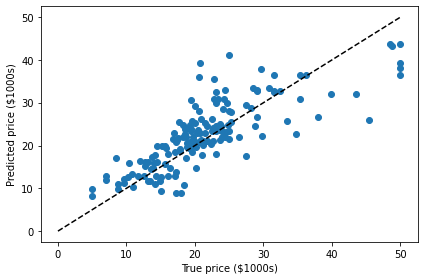

In [220]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()




3.1.2 linear regression with gradient

In [221]:
import linearregression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [222]:
X, y = load_boston(return_X_y=True)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [225]:
#np.dot(np.ones(X_train.shape), np.ones(y_train.shape)).shape
#Here I try to fix the problem of shapes
weights = linearregression.init_w(X_train) # set weights to zero
bias = linearregression.init_b(X_train)
weights, bias = linearregression.train_with_gradient(X_train, y_train, weights, bias, 100000)

ValueError: operands could not be broadcast together with shapes (339,13) (339,) 

In [ ]:
print(weight, bias)

In [ ]:
y_pred1 = []
# This code is running the prediction for each one of the instances in the test set.
for instance in X_test:
    y_pred1.append(linearregression.predict(instance))
y_pred1

In [ ]:
print(r2_score(y_test, y_pred1)) 

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
plt.scatter(y_test, y_pred1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()


3.2 Breast Cancer Wisconsin

3.2.1 KNN

In [250]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

In [251]:
cancer_data = load_breast_cancer()
#df_cancer = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
#cancer_data.feature_names


In [252]:
X = cancer_data.data
y = cancer_data.target
#print(cancer_data.target_names)

In [253]:
#df_cancer.info()

In [254]:
#df_cancer.describe()

In [255]:
#df_cancer.isna().any()

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [257]:
import knn

In [258]:
knn_cancer = knn.KNN(3)

In [259]:
X_train

array([[1.546e+01, 1.189e+01, 1.025e+02, ..., 1.827e-01, 3.216e-01,
        1.010e-01],
       [1.285e+01, 2.137e+01, 8.263e+01, ..., 5.601e-02, 2.488e-01,
        8.151e-02],
       [1.921e+01, 1.857e+01, 1.255e+02, ..., 2.091e-01, 3.537e-01,
        8.294e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [260]:
#print(X_train.shape, y_train.shape)

In [261]:
knn_cancer.fit(X_train, y_train)

In [262]:
#knn_cancer._compute_distance(X_train[0], X_train[1])

In [263]:
knn_cancer.predict(X_train[0])

[0, 0, 0]


0

In [264]:
y_pred = []
# This code is running the prediction for each one of the instances in the test set.
for instance in X_test:
    y_pred.append(knn_cancer.predict(instance))
y_pred

[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 0]
[1, 0, 1]
[1, 1, 1]
[0, 0, 0]
[1, 0, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[0, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 0]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 0, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[0, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 0, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 0]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]


[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1]

In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.96      0.95      0.95       121

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



In [271]:
metrics.accuracy_score(y_test, y_pred)

0.9414893617021277

3.2.2 logistic regression

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target
print(cancer_data.target_names)

['malignant' 'benign']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
import logisticregression

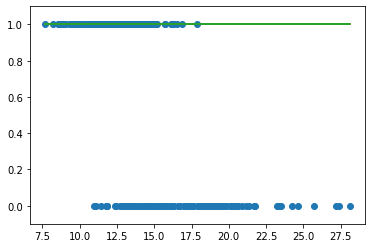

Iteration: 0 Loss:nan Accuracy: [0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 

ValueError: non-broadcastable output operand with shape (30,1) doesn't match the broadcast shape (30,381)

In [12]:
weights = logisticregression.init_w_with_bias(X_train) # set weights to zero
weights = logisticregression.train_with_gradient_logistic_regression(X_train, y_train, weights, iterations=60000, reg=True)

In [88]:
y_pred1 = []
# This code is running the prediction for each one of the instances in the test set.
for instance in X_test:
    y_pred.append(logisticregression.predict_logistic(instance, weights))
y_pred1

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [89]:
print(classification_report(y_test, y_pred1))

ValueError: Found input variables with inconsistent numbers of samples: [188, 0]

4. Using Scikit-learn and comparing results

4.1 SKlearn linear model, Boston housing price

In [272]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
X = boston_data.data
y = boston_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [274]:
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train)

LinearRegression()

In [275]:
print(linearModel.score(X_test, y_test))

0.7261570836552481


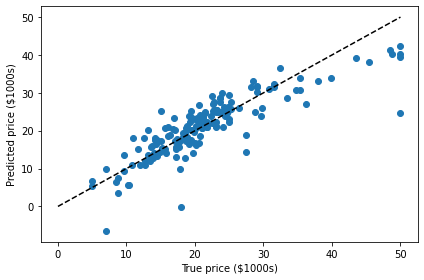

In [277]:
predicted = linearModel.predict(X_test)
plt.scatter(y_test, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [278]:
mean_squared_error(y_test, predicted)

20.724023437339717

L1 regularization

In [279]:
cross_val_scores_lasso = [] 

In [280]:
Lambda = []

In [281]:
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 

In [282]:
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 27.608828464279295
0.5 : 26.77241161020672
0.75 : 24.020533308874743
1.0 : 18.76525481473786
1.25 : 13.877012809558348
1.5 : 11.380349361635606
1.75 : 9.106554534743504
2.0 : 7.027656235880472


In [283]:
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 

Lasso(alpha=2, tol=0.0925)

In [284]:
print(lassoModelChosen.score(X_test, y_test))

0.5873750735568986


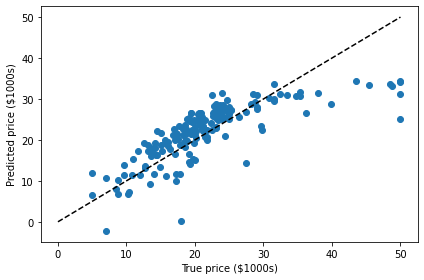

In [285]:
predicted = lassoModelChosen.predict(X_test)
plt.scatter(y_test, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [286]:
mean_squared_error(y_test, predicted)

31.226838950516804

L2 regularization through Ridge regression

In [287]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 22.880608596361377
0.5 : 24.290025821905953
0.75 : 25.110242012791346
1.0 : 25.616687037593206
1.25 : 25.943971453733734
1.5 : 26.163442226131462
1.75 : 26.315344550034688
2.0 : 26.42352447439257


In [288]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train, y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test)) 

0.7173120152235957


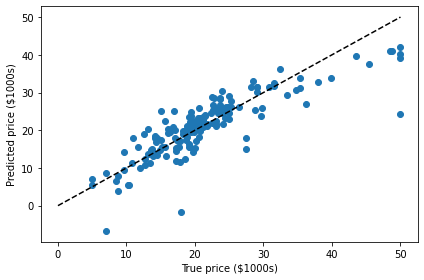

In [289]:
predicted = ridgeModelChosen.predict(X_test)
plt.scatter(y_test, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [290]:
mean_squared_error(y_test, predicted)

21.393405022699653

In [159]:
# Building the two lists for visualization 
models = ['Linear Regression', 'L2_Ridge Regression', 'L1_Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
         ridgeModelChosen.score(X_test, y_test), 
         lassoModelChosen.score(X_test, y_test)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['L2_Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['L1_Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

Linear Regreesion : 0.7261570836552481
L2_Ridge Regreesion : 0.7173120152235957
L1_Lasso Regression : 0.5873750735568986


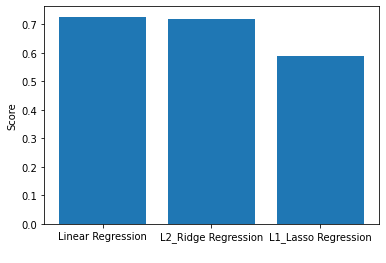

In [160]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel(' ') 
plt.ylabel('Score') 
plt.show()

Gradient

In [296]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [297]:
def plot_pred_and_test(X_test, clf):
    predicted = clf.predict(X_test)
    plt.scatter(y_test, predicted)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

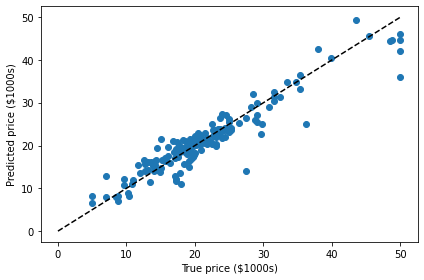

In [298]:
plot_pred_and_test(X_test, clf)

In [299]:
mean_squared_error(y_test, predicted)

21.393405022699653



4.2 Logistic Rregression, Breast Cancer dataset

In [226]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [227]:
cancer_data = load_breast_cancer(as_frame = True)
df_cancer = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [300]:
data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target
data.target_names
print(cancer_data.target_names)

['malignant' 'benign']


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [308]:
def train_and_plot(X_train, y_train, X_test, y_test, penalty="l2"):
    print(f"Penalty {penalty}")
    if penalty=='elasticnet':
        model = LogisticRegression(solver='saga', penalty=penalty, l1_ratio=0.7)
    else:
        model = LogisticRegression(solver='saga', penalty=penalty)
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', model)])

    
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))
    importance = model.coef_[0]

    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Penalty none
0.9840425531914894


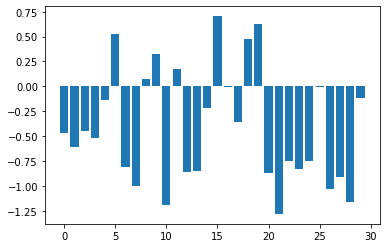

Penalty l2
0.9840425531914894


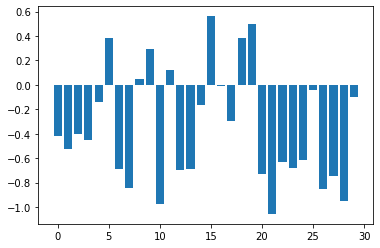

Penalty l1
0.9840425531914894


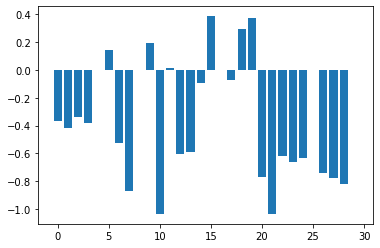

In [309]:
train_and_plot(X_train, y_train, X_test, y_test, "none")
train_and_plot(X_train, y_train, X_test, y_test, "l2")
train_and_plot(X_train, y_train, X_test, y_test, "l1")

L1 regularization

In [315]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 100, penalty= 'l1',solver='liblinear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.99      0.97      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



L2

In [316]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 100, penalty= 'l2',solver='liblinear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.97      0.96      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188

